# AR(p) Parameter Estimation

The $\text{AR}(p)$ process is defined by,

$
\begin{align}
X_t = \sum_{i=1}^p \varphi_i X_{t-i} + \varepsilon_{t}
\end{align}
$

where,

$
\begin{align}
\varepsilon_t \sim \text{Normal}(0, \sigma^2)
\end{align}
$

The Yule-Walker equations are relate the AR(p) parameters $\varphi_i$ to the autocorrelation function. If zero mean is</br>
assumed it follows that,

$
\begin{align}
\rho_n = \frac{\text{E}[X_t X_{t-n}]}{\text{E}[X_t^2]}
\end{align}
$

The autocorrelation functions can be shown to have the following properties,

$
\begin{align}
&\rho_0 = 1 \\
&\rho_n \leq 1 \\
&\rho_n = \rho_{-n}
\end{align}
$

Define the matrices,

$
\begin{align}
\hat{r} =
\begin{bmatrix}
\rho_1 \\
\rho_2 \\
\rho_3 \\
\vdots \\
\rho_{n-1} \\
\rho_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{\Phi} =
\begin{bmatrix}
\varphi_1 \\
\varphi_2 \\
\varphi_3 \\
\vdots \\
\varphi_{n-1} \\
\varphi_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{R} =
\begin{bmatrix}
1 & \rho_1 & \rho_2 & \cdots & \rho_{n-2} & \rho_{n-1} \\
\rho_1 & 1 & \rho_1 & \cdots & \rho_{n-3} & \rho_{n-2} \\
\rho_2 & \rho_1 & 1 & \cdots & \rho_{n-4} & \rho_{n-3} \\
\vdots & \vdots  & \vdots & \ddots & \vdots & \vdots \\
\rho_{n-2} & \rho_{n-3} & \rho_{n-4} & \cdots & 1 & \rho_1 \\
\rho_{n-1} & \rho_{n-2} & \rho_{n-3} & \cdots & \rho_1 & 1 \\
\end{bmatrix}
\end{align}
$

Then the Yule-Walker equations are given by,

$
\begin{align}
\hat{\Phi} = \hat{R}^{-1} \hat{r}
\end{align}
$

## Examples

The Yule-Walker equations for $\text{AR}(1)$ is given by,

$
\begin{align}
\varphi_1 = \rho_1
\end{align}
$

This is the OLS solution.

For $\text{AR}(2)$,

$
\begin{align}
\varphi_1 &= \frac{\rho_1 - \rho_1 \rho_2}{1 - \rho_1^2} \\
\varphi_2 &= \frac{\rho_2 - \rho_1^2}{1 - \rho_1^2}
\end{align}
$

## Stationaity

Stationarity of an $\text{AR}(p)$ leads to convergence of the moments as $t \to \infty$. Recall the shift operator, $L$, defined by,

$
\begin{align}
&L X_t = X_{t-1} \\
&L^2 X_t = X_{t-2} \\
&L^3 X_t = X_{t-3} \\
&\vdots
\end{align}
$

An $\text{AR}(p)$ process can be written as,

$
\begin{align}
\varepsilon_t = (1 - \varphi L - \varphi^2 L^2 - \varphi^3 L^3 - \cdots - \varphi^p L^p) X_t
\end{align}
$

The characteristic equation is obtained by replacing $L$ with the variable $z$ and setting the result to zero,

$
\begin{align}
1 - \varphi z - \varphi^2 z^2 - \varphi^3 z^3 - \cdots - \varphi^p z^p = 0
\end{align}
$

Stationarity requires that $\lvert z \rvert > 1$. To see this consider $\text{AR}(1)$. The characteristic equation is,

$
\begin{align}
1 - \varphi z = 0
\end{align}
$

The solution is $z = \frac{1}{\varphi}$. It follows that stationarity requires,

$
\begin{align}
\lvert \varphi \rvert < 1
\end{align}
$

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import plots
from lib import config
from lib import arima
from lib import stats

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Simulations

In [2]:
nsample = 10000

φ1 = numpy.array([0.2])
ar1 = arima.arp(φ1, nsample)

φ2 = numpy.array([0.2, 0.4])
ar2 = arima.arp(φ2, nsample)

φ3 = numpy.array([0.2, 0.3, 0.3])
ar3 = arima.arp(φ3, nsample)

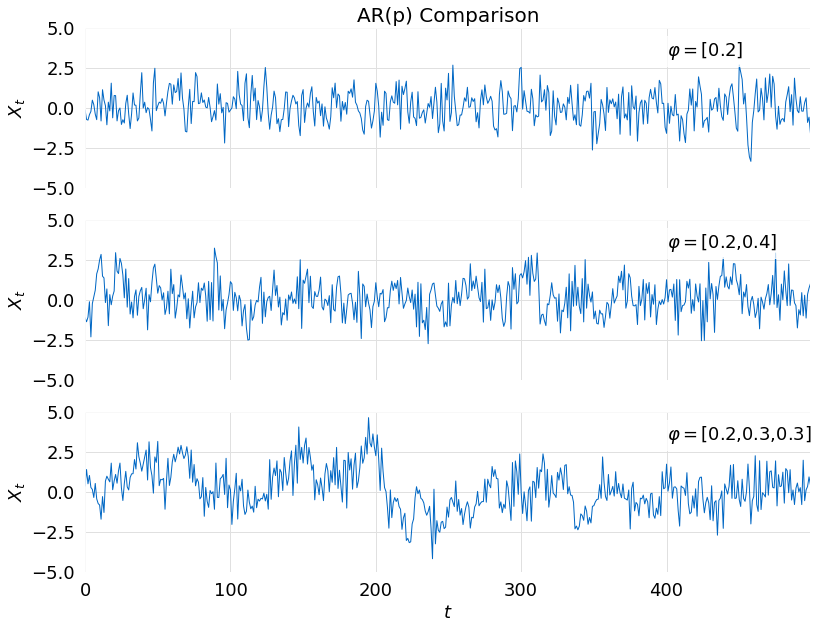

In [3]:
labels = [r"$\varphi=$"+f"{numpy.array2string(φ1, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ2, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ3, precision=2, separator=',')}"]
title = "AR(p) Comparison"
samples = [ar1[:500], ar2[:500], ar3[:500]]
plots.stack(samples, [-5.0, 5.0], title, labels)

## Estimation of $\text{AR}(p)$ Parameters

$\text{AR}(p)$ parameters are estimated using two methods. The Yule-Walker ACF and `statsmodels.tsa.arima_model.ARMA`

### AR(1) Example ($\varphi = 0.2$)

In [4]:
arima.yw(ar1, 1)

array([0.18718439])

In [5]:
result = arima.ar_estimate(ar1, 1)
result.polynomial_ar, result.bse

(array([ 1.        , -0.18718482]),
 array([0.01220885, 0.00969654, 0.01421466]))

In [6]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -14110.050
Date:                Thu, 24 Mar 2022   AIC                          28226.100
Time:                        09:37:36   BIC                          28247.731
Sample:                             0   HQIC                         28233.422
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0042      0.012     -0.343      0.732      -0.028       0.020
ar.L1          0.1872      0.010     19.304      0.000       0.168       0.206
sigma2         0.9842      0.014     69.236      0.000       0.956       1.012
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 5.01
Prob(Q):                              1.00   Prob(JB):                         0.08
Heteroskedasticity (H):               0.97   Skew:                            -0.04
Prob(H) (two-sided):                  0.37   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### AR(2) Example ($\varphi = [0.2, 0.4]$)

In [7]:
arima.yw(ar2, 2)

array([0.19740775, 0.39790828])

In [8]:
result = arima.ar_estimate(ar2, 2)
result.polynomial_ar, result.bse

(array([ 1.        , -0.19742864, -0.39795627]),
 array([0.02452336, 0.00899869, 0.00905083, 0.01399291]))

In [9]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -14106.224
Date:                Thu, 24 Mar 2022   AIC                          28220.448
Time:                        09:37:37   BIC                          28249.289
Sample:                             0   HQIC                         28230.210
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0268      0.025      1.093      0.274      -0.021       0.075
ar.L1          0.1974      0.009     21.940      0.000       0.180       0.215
ar.L2          0.3980      0.009     43.969      0.000       0.380       0.416
sigma2         0.9835      0.014     70.282      0.000       0.956       1.011
===================================================================================
Ljung-Box (L1) (Q):                   0.50   Jarque-Bera (JB):                 1.27
Prob(Q):                              0.48   Prob(JB):                         0.53
Heteroskedasticity (H):               1.00   Skew:                             0.03
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### AR(3) Example ($\varphi = [0.2, 0.3, 0.3]$)

In [10]:
arima.yw(ar3, 3)

array([0.19511311, 0.30373871, 0.29277191])

In [11]:
result = arima.ar_estimate(ar3, 3)
result.polynomial_ar, result.bse

(array([ 1.        , -0.19493476, -0.30379243, -0.29287205]),
 array([0.04808385, 0.00965966, 0.00940251, 0.00967145, 0.01428411]))

In [12]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -14210.400
Date:                Thu, 24 Mar 2022   AIC                          28430.800
Time:                        09:37:37   BIC                          28466.852
Sample:                             0   HQIC                         28443.004
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0016      0.048      0.033      0.974      -0.093       0.096
ar.L1          0.1949      0.010     20.180      0.000       0.176       0.214
ar.L2          0.3038      0.009     32.310      0.000       0.285       0.322
ar.L3          0.2929      0.010     30.282      0.000       0.274       0.312
sigma2         1.0041      0.014     70.296      0.000       0.976       1.032
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):                 0.65
Prob(Q):                              0.55   Prob(JB):                         0.72
Heteroskedasticity (H):               1.03   Skew:                            -0.02
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""